In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [3]:
path = '../data/aftershock-region.csv'
data = pd.read_csv(path)
data = data.dropna()
print(data.head)
print(data.columns)

<bound method NDFrame.head of      magnitude  region  region_log
0          7.9   13000    4.113943
1          7.9   12700    4.103804
2          7.9   12600    4.100371
3          7.9   12600    4.100371
4          7.9   12900    4.110590
..         ...     ...         ...
184        5.1      16    1.204120
185        5.1      15    1.176091
186        5.1      15    1.176091
187        5.1      14    1.146128
188        5.1      14    1.146128

[189 rows x 3 columns]>
Index(['magnitude', 'region', 'region_log'], dtype='object')


In [4]:
x = data[['magnitude']]
y = data[['region']]
print(x.shape, y.shape)

(189, 1) (189, 1)


In [5]:
def poly(x, degree):
    model = PolynomialFeatures(degree=degree, include_bias=True)
    x_poly = model.fit_transform(x)
    print(model.get_feature_names())
    return x_poly


In [6]:
x_poly = poly(x, 8)
poly_model = LinearRegression()
poly_model.fit(x_poly, y)

['1', 'x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8']


c:\Users\didhw\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


LinearRegression()

In [7]:
for i in range(len(poly_model.coef_[0])):
    print(f"w{i+1}: ", poly_model.coef_[0][i])
print("b: ", poly_model.intercept_[0])
#     print(f"{poly_model.coef_[0][i]}*x^{i+1}+",end='')
# print(poly_model.intercept_[0])

w1:  0.0
w2:  2512443062.172753
w3:  -1429888586.903593
w4:  463678190.7983656
w5:  -93700828.68019605
w6:  12082794.798266413
w7:  -970894.9379221655
w8:  44444.853267049366
w9:  -887.380619447381
b:  -1925878210.1773143


In [11]:
y_predict = poly_model.predict(x_poly)

print("정확도: ", r2_score(y, y_predict))
print(mean_squared_error(y,y_predict))

정확도:  0.9868374655390433
164676.4568311914


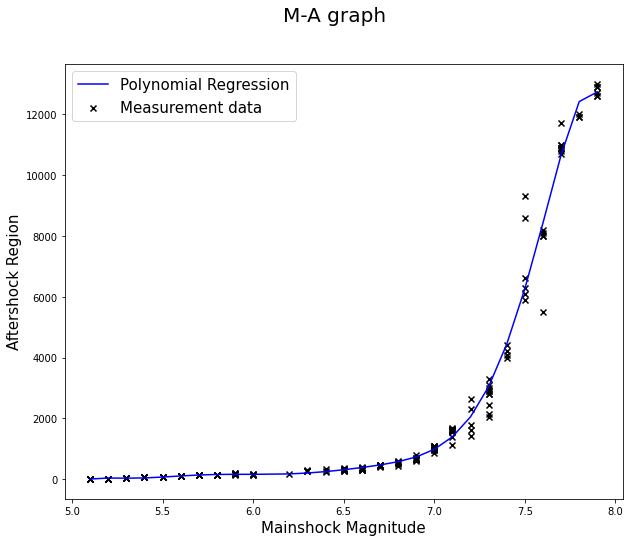

In [10]:
# graph
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c='black', marker='x',label='Measurement data')
plt.plot(x, y_predict, c='blue',label='Polynomial Regression')
plt.xlabel('Mainshock Magnitude', fontsize='15')
plt.ylabel('Aftershock Region', fontsize='15')
plt.suptitle('M-A graph', fontsize='20')
plt.legend(fontsize='15')
plt.show()